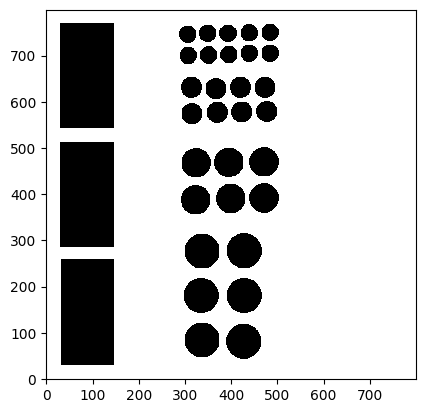

In [ ]:
##Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt


def initialize_grid(size):
    #creando la matriz con 0
    return np.zeros((size, size), dtype=int)

    ##Visualizacion de la matriz
def display_grid(grid):
    plt.imshow(grid, cmap='binary', interpolation='nearest') #Esquma de colores binario blanco y negro por defecto
    plt.gca().invert_yaxis() #invertir el eje y puesto que Matplotlib por defecto considera el area de trabajo a el 4to cuadrante
    plt.show()
#determina que la celula en i j debe estar viva en la proxima generacion
def reglas_circulos(grid, i, j, circles):

    #La distancia se calcula  de la forma euclidiana para la ubiacion del centro: raiz cuadrada (x1-x2)**2 + (y1-y2)**2
    distance_to_centers = np.sqrt((i - np.array([circle['center_x'] for circle in circles]))**2 +
                                  (j - np.array([circle['center_y'] for circle in circles]))**2)

    #La funcion devolvera true si las celulas deben estar cerca del centro, usando el radio.
    return np.any(distance_to_centers < np.array([circle['radius'] for circle in circles]))

  ##De la misma manera que los circulos, pero en lugar de centro se escoge la esquina superior izquierda(x,y) y ancho y largo
def reglas_rectangulos(grid, i, j, rectangles):

    for rectangle in rectangles:
      #si la celula esta dentro del rectangulo , sigue viva y de vuelve true
        if rectangle['x'] <= i < rectangle['x'] + rectangle['width'] and \
           rectangle['y'] <= j < rectangle['y'] + rectangle['height']:
            return True
    return False

  ##Generacion de automatas.
def generate_ca(size, generations, circles, rectangles):
    grid = initialize_grid(size)  ##Crea una cuadricula del tamaño requerido
    all_generations = [grid.copy()] ##Lista que almacenara todas las generaciones del automata

    for _ in range(generations):  ##Itera por las generaciones y la cuadricula
        new_grid = np.zeros_like(grid)
        for i in range(size):
            for j in range(size):
              ##Si se cumple una de las reglas para circulo o rectangulo la celda se asigna a 1, es decir viva
                if reglas_circulos(grid, i, j, circles) or reglas_rectangulos(grid, i, j, rectangles):
                    new_grid[i, j] = 1
        grid = new_grid.copy()
        all_generations.append(grid.copy())

    return all_generations


size = 800
generations = 1
##Variables obtenidas del programa anterior
circles = [{'center_x': 749, 'center_y': 484, 'radius': 19}, {'center_x': 704, 'center_y': 484, 'radius': 19}, {'center_x': 578, 'center_y': 477, 'radius': 23}, {'center_x': 630, 'center_y': 473, 'radius': 23}, {'center_x': 469, 'center_y': 471, 'radius': 32}, {'center_x': 391, 'center_y': 471, 'radius': 32}, {'center_x': 748, 'center_y': 439, 'radius': 19}, {'center_x': 704, 'center_y': 439, 'radius': 19}, {'center_x': 577, 'center_y': 423, 'radius': 23}, {'center_x': 630, 'center_y': 420, 'radius': 23}, {'center_x': 277, 'center_y': 428, 'radius': 38}, {'center_x': 180, 'center_y': 428, 'radius': 38}, {'center_x': 81, 'center_y': 427, 'radius': 38}, {'center_x': 701, 'center_y': 395, 'radius': 19}, {'center_x': 747, 'center_y': 393, 'radius': 19}, {'center_x': 390, 'center_y': 399, 'radius': 32}, {'center_x': 468, 'center_y': 395, 'radius': 32}, {'center_x': 576, 'center_y': 370, 'radius': 23}, {'center_x': 627, 'center_y': 367, 'radius': 23}, {'center_x': 700, 'center_y': 351, 'radius': 19}, {'center_x': 747, 'center_y': 349, 'radius': 19}, {'center_x': 276, 'center_y': 337, 'radius': 38}, {'center_x': 84, 'center_y': 337, 'radius': 38}, {'center_x': 180, 'center_y': 335, 'radius': 38}, {'center_x': 573, 'center_y': 315, 'radius': 23}, {'center_x': 630, 'center_y': 314, 'radius': 23}, {'center_x': 467, 'center_y': 324, 'radius': 32}, {'center_x': 387, 'center_y': 323, 'radius': 32}, {'center_x': 699, 'center_y': 307, 'radius': 19}, {'center_x': 745, 'center_y': 306, 'radius': 19}]

rectangles = [
    {'x': 31, 'y': 32, 'width': 228, 'height': 116}, {'x': 543, 'y': 30, 'width': 227, 'height': 117}, {'x': 286, 'y': 30, 'width': 227, 'height': 117}]

#Ejecucion del Programa
ca_generations = generate_ca(size, generations, circles, rectangles)
display_grid(ca_generations[-1]) ##se pone -1 para acceder al ultimo elemento de la lista para visualizarse
